<a href="https://colab.research.google.com/github/RaymondUW2023/NN-Group-Project-Team-14/blob/main/PCA_of_Cifar_10_And_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Examples of PCA followed from Tensorflow website

In [31]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

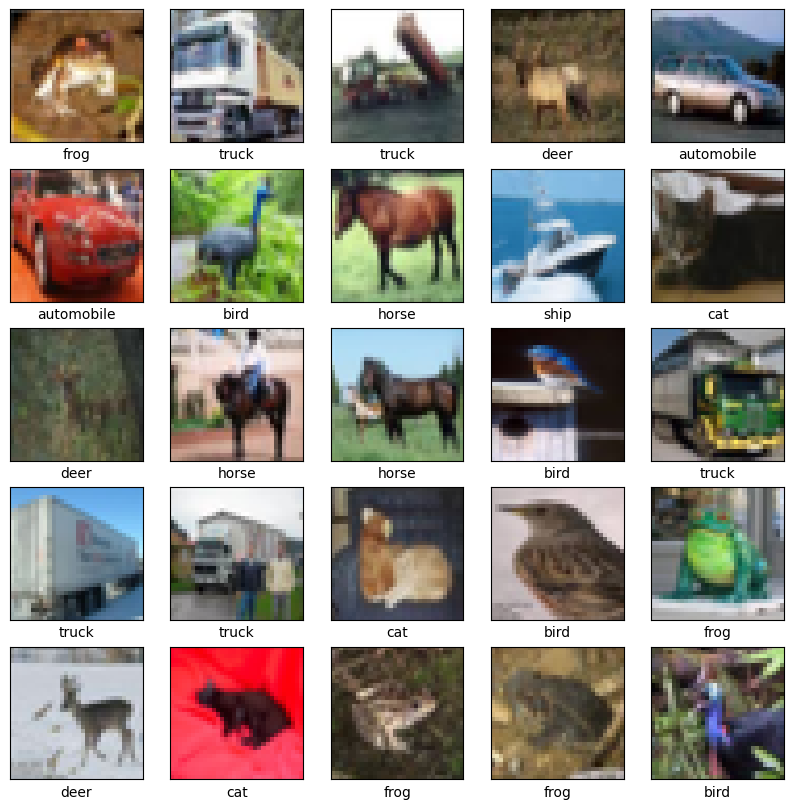

In [32]:
# Visualizing the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [33]:
x_train = train_images.reshape((50000,3072))
x_test = test_images.reshape((10000,3072))
y_train = train_labels.reshape(50000,)
y_test = test_labels
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000, 1))

Applying PCA

In [105]:
import sklearn
from sklearn.decomposition import PCA

In [106]:
import sklearn
from sklearn.decomposition import PCA
k = 30
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 30), (10000, 30))

Building the KNN

In [107]:
# Model building:  KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train_transformed, y_train)
y_pred = knn.predict(x_test_transformed)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Performance evaluation
print("P(classification) =", np.round(accuracy_score(y_test, y_pred), 5))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

P(classification) = 0.4004
Confusion matrix: 
 [[602  29  95  13  40  10  32   9 151  19]
 [120 430  54  33  63  27  73  20 118  62]
 [137  15 407  55 173  43 112  34  19   5]
 [ 67  37 148 233 128 128 165  43  32  19]
 [ 93  15 236  37 390  22 127  44  28   8]
 [ 66  25 174 150 116 281 105  42  32   9]
 [ 38  13 186  60 172  30 457  17  20   7]
 [ 96  34 131  46 160  49  87 335  32  30]
 [167  56  44  30  47  12  27  16 580  21]
 [163 163  42  35  53  16  69  43 127 289]]


In [109]:
# Model building:  KNN classifier

# Loop to find the best number of nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
temp = 0;
for j in range(k):
  knn = KNeighborsClassifier(n_neighbors=j+1).fit(x_train_transformed, y_train)
  y_pred = knn.predict(x_test_transformed)
  if temp < np.round(accuracy_score(y_test, y_pred), 5):
    temp = np.round(accuracy_score(y_test, y_pred), 5)
    bestk = j

In [110]:
# Performance evaluation
print(bestk+1)
print("P(classification) =", np.round(accuracy_score(y_test, y_pred), 5))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))


13
P(classification) = 0.4155
Confusion matrix: 
 [[561  19  87  13  43   7  48  16 187  19]
 [ 72 358  57  20  73  17 142  15 172  74]
 [119   6 391  42 195  26 144  21  44  12]
 [ 59  18 135 161 157 103 258  41  37  31]
 [ 64   5 229  17 466   8 137  34  36   4]
 [ 42  11 154  94 157 271 172  45  40  14]
 [ 13   4 148  22 168  13 591  16  17   8]
 [ 61  24 113  39 193  34 120 339  44  33]
 [117  29  33  32  45  10  25  10 669  30]
 [101  90  40  20  53  15 102  37 194 348]]


Visualize the Results

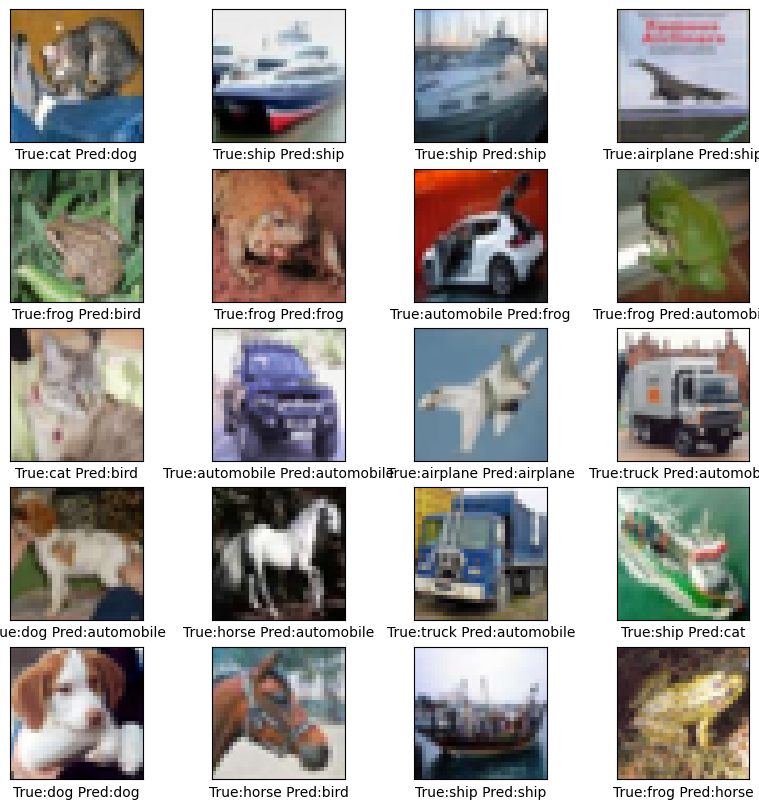

In [93]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index," Predicted: ",class_names[y_pred[i][0]]
    plt.xlabel('True:'+class_names[test_labels[i][0]]+' '+'Pred:'+class_names[y_pred[i]])
plt.show()

# Copied an example from a kaggle bloglen(y_pred)

Building a Log Regression Classifier

In [102]:
# Change the PCA if you so choose
import sklearn
from sklearn.decomposition import PCA
k = 50
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 50), (10000, 50))

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
# Create a logistic regression model for multiclass classification

logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
logreg.fit(x_train_transformed, y_train)

# Make predictions on the test set
predictions = logreg.predict(x_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the Logistic Regression model:", accuracy)

Accuracy of the Logistic Regression model: 0.3781


Build a Random Forest / Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [119]:
import sklearn
from sklearn.decomposition import PCA
k = 200
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 200), (10000, 200))

In [120]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train_transformed, y_train)

In [121]:
y_hat = clf.predict(x_test_transformed)

In [122]:
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test_transformed,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[346  60 102  66  71  48  40  58 143  66]
 [ 71 295  64  67  61  56  61  73 103 149]
 [105  48 213  82 163  84 131  95  43  36]
 [ 76  60  88 183 103 158 115  89  62  66]
 [ 55  44 159  90 231  97 146  91  46  41]
 [ 60  45  90 151  91 216 120  96  68  63]
 [ 39  44 118 119 129 103 281  79  39  49]
 [ 72  69  95  99 112 101 102 221  52  77]
 [128  85  62  62  55  48  34  41 372 113]
 [108 149  69  64  53  54  54  76 106 267]]
Accuracy: 26.25%


XGBoosting Time

In [131]:
import sklearn
from sklearn.decomposition import PCA
k = 300
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 300), (10000, 300))

In [132]:
# XGBoost
# First XGBoost model for Pima Indians dataset
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [133]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [138]:
# make predictions for test data
y_pred = model.predict(x_test_transformed)
predictions = [round(value) for value in y_pred]

In [141]:
# Performance evaluation

print("P(classification) =", np.round(accuracy_score(y_test, predictions), 5))
print("Confusion matrix: \n", confusion_matrix(y_test,predictions))


P(classification) = 0.5091
Confusion matrix: 
 [[570  42  62  27  29  16  30  25 141  58]
 [ 43 602  10  33  13  18  29  24  55 173]
 [ 88  33 372 101 128  75 101  58  29  15]
 [ 41  30  93 334  47 200 110  58  36  51]
 [ 39  13 131  81 433  61 118  79  28  17]
 [ 21  24  79 227  61 395  63  76  28  26]
 [  7  23  70  82  77  49 624  29  17  22]
 [ 29  27  46  60  78  81  39 547  22  71]
 [ 94  77  23  27  13  25  11  21 649  60]
 [ 47 172  17  27   9  22  26  42  73 565]]


In [142]:
from sklearn.svm import SVC
